In [1]:
import pandas as pd
import numpy as np

df = pd.read_csv('player_id1.csv')
df

,player_name,player_id
0,S A Abbott,4331
1,A C Agar,4224
2,G J Bailey,3929
3,C T Bancroft,4521
4,J P Behrendorff,4705
...,...,...
1168,P Simran Singh,5859
1169,K Khejroliya,4669
1170,M K Lomror,4541
1171,J Suchith,4401


In [66]:
# from get_player_id import get_player_id
from exp import getPlayerPerformanceIndex
from exp import getBowlerPerformanceIndex
def convertDate(date):
    return date[0:2] + '/' + date[3:5] + '/' + date[6:10]

df2 = pd.read_csv('my_data.csv')
n = len(df2)

for i in range(0,1):
    player_id = df2.at[i, 'player_id']
    player_id = str(player_id)
    match_date = convertDate(df2.at[i, 'match_date'])
    
    if player_id == '1':
        continue
    
    print(player_id, match_date)
    battingPerformance = getPlayerPerformanceIndex(player_id, match_date)
    
    # Use .at to explicitly work on a copy of the DataFrame
    df2.at[i, 'Average Form'] = battingPerformance[1]
    df2.at[i, 'Consistency'] = battingPerformance[2]
    df2.at[i, 'Average'] = battingPerformance[3]
    df2.at[i, 'Strike Rate'] = battingPerformance[4]
    df2.at[i,'Total Runs'] = battingPerformance[0]
    df2.at[i,'Last Bat Innings'] = battingPerformance[5]

    bowlingPerformance = getBowlerPerformanceIndex(player_id, match_date)
    #it returns 'Bowling_Consistency','Recent_Bowling_Avg','Recent_Eco','Career_Bowling_Avg','Career_Wickets','Career_Eco'
    df2.at[i, 'Bowling_Consistency'] = bowlingPerformance[0]
    df2.at[i, 'Recent_Bowling_Avg'] = bowlingPerformance[1]
    df2.at[i, 'Recent_Eco'] = bowlingPerformance[2]
    df2.at[i, 'Career_Bowling_Avg'] = bowlingPerformance[3]
    df2.at[i, 'Career_Wickets'] = bowlingPerformance[4]
    df2.at[i, 'Career_Eco'] = bowlingPerformance[5]
    df2.at[i, 'Last_Bowl_Innings'] = bowlingPerformance[6]
    
    print("done ", i)

print(df2)
#df2.to_csv('score_card.csv', index=False)


[36, 6.0, 0.5, 12.0, 0, 1]
3850 23/03/2019
done  0
             Unnamed: 0  player_id  match_date  notout  runs  balls  fours  \
0           Imran Tahir       3850  23-03-2019       0     0      0      0   
1       Harbhajan Singh       2138  23-03-2019       0     0      0      0   
2             RA Jadeja       3644  23-03-2019       1     6     15      0   
3                MM Ali       4271  23-03-2019       0     9      8      0   
4              DJ Bravo       3166  23-03-2019       0     0      0      0   
...                 ...        ...         ...     ...   ...    ...    ...   
1284  S Sandeep Warrier       4126  05-05-2019       0     0      0      0   
1285       Ishan Kishan       4544  05-05-2019       0     0      0      0   
1286          HF Gurney       4307  05-05-2019       0     0      0      0   
1287          SP Narine       3922  05-05-2019       0     0      0      0   
1288         AD Russell       3836  05-05-2019       0     0      1      0   

      sixes 

In [68]:
df2
df2.to_csv('my_data.csv', index=False)

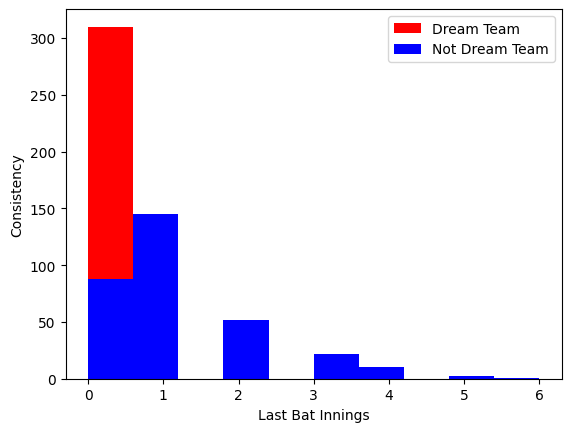

In [69]:
import matplotlib.pyplot as plt
import pandas as pd

df = pd.read_csv('my_data.csv')

# Filtering condition
df1 = df[df['Total Runs'] > 300]
df_dream = df1[df1['dreamTeam'] == 1]
df_not_dream = df1[df1['dreamTeam'] == 0]

# plt.scatter(df_dream['Last Bat Innings'], df_dream['Consistency'], color='red', marker='o', label='Dream Team')
# plt.scatter(df_not_dream['Last Bat Innings'], df_not_dream['Consistency'], color='blue', marker='x', label='Not Dream Team')
#histogram between consistency and last bat innings
plt.hist(df_dream['Last Bat Innings'], color='red', label='Dream Team')
plt.hist(df_not_dream['Last Bat Innings'], color='blue', label='Not Dream Team')
plt.xlabel('Last Bat Innings')
plt.ylabel('Consistency')
plt.legend()

In [85]:
import matplotlib.pyplot as plt
import pandas as pd
from sklearn.model_selection import train_test_split


df = pd.read_csv('my_data.csv')

# Filtering condition
X = df[['Total Runs', 'Average Form', 'Consistency', 'Average', 'Strike Rate', 'Last Bat Innings', 'Bowling_Consistency',
        'Recent_Bowling_Avg', 'Recent_Eco', 'Career_Bowling_Avg', 'Career_Wickets', 'Career_Eco', 'Last_Bowl_Innings']]

X['Career_Bowling_Avg'] = X['Career_Bowling_Avg'].replace(0, 100)
X['Career_Eco'] = X['Career_Eco'].replace(0, 20)
X['Recent_Eco'] = X['Recent_Eco'].replace(0, 20)
X['Recent_Bowling_Avg'] = X['Recent_Bowling_Avg'].replace(0, 100)
Y = df['dreamTeam']
print(X.iloc[7])

# scale average form,average,strikerate,recent_bowling_avg,recent_eco,career_bowling_avg,career_eco
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
X[['Average Form', 'Average', 'Strike Rate', 'Recent_Bowling_Avg', 'Recent_Eco', 'Career_Bowling_Avg', 'Career_Eco']] = scaler.fit_transform(
    X[['Average Form', 'Average', 'Strike Rate', 'Recent_Bowling_Avg', 'Recent_Eco', 'Career_Bowling_Avg', 'Career_Eco']])


X_train, X_test, y_train, y_test = train_test_split(X, Y, test_size=0.2, random_state=1)




Total Runs             2504.00
Average Form             28.00
Consistency               0.70
Average                  22.16
Strike Rate             117.84
Last Bat Innings          0.00
Bowling_Consistency       0.00
Recent_Bowling_Avg      100.00
Recent_Eco               20.00
Career_Bowling_Avg      100.00
Career_Wickets            0.00
Career_Eco               20.00
Last_Bowl_Innings         0.00
Name: 7, dtype: float64


C:\Users\dutta\AppData\Local\Temp\ipykernel_23636\1605550945.py:12: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  X['Career_Bowling_Avg'] = X['Career_Bowling_Avg'].replace(0, 100)
C:\Users\dutta\AppData\Local\Temp\ipykernel_23636\1605550945.py:13: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  X['Career_Eco'] = X['Career_Eco'].replace(0, 20)
C:\Users\dutta\AppData\Local\Temp\ipykernel_23636\1605550945.py:14: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using

In [87]:
from sklearn import tree
from sklearn.linear_model import LogisticRegression
# import random forest classifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.naive_bayes import MultinomialNB
# import svm
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score
from sklearn.linear_model import Lasso
from sklearn.linear_model import Ridge

model_params = {
    # 'svm': {
    #     'model': SVC(gamma='auto'),
    #     'params': {
    #         'C': [1, 10, 20],
    #         'kernel': ['rbf', 'linear']
    #     }
    # },
    'random_forest': {
        'model': RandomForestClassifier(),
        'params': {
            'n_estimators': [1, 5, 10,100,500]
        }
    },
    'logistic_regression': {
        'model': LogisticRegression(solver='liblinear', multi_class='auto'),
        'params': {
            'C': [1, 5, 10,50,100,500]
        }
    },
    'naive_bayes': {
        'model': GaussianNB(),
        'params': {
        }
    },
    # 'naive_bayes_multinomial': {
    #     'model': MultinomialNB(),
    #     'params': {
    #     }
    # },
    'decision_tree': {
        'model': tree.DecisionTreeClassifier(),
        'params': {
            'criterion': ['gini', 'entropy']
        }
    },
    'lasso': {
        'model': Lasso(),
        'params': {
            'alpha': [1, 5, 10,50],
            'max_iter': [100, 500, 1000]
        }
    },
    'ridge': {
        'model': Ridge(),
        'params': {
            'alpha': [1, 5, 10,50],
            'max_iter': [100, 500, 1000]
        }
    }

}

In [88]:
from sklearn.model_selection import GridSearchCV

scores = []
for model_name, mp in model_params.items():
    clf = GridSearchCV(mp['model'], mp['params'], cv=5, return_train_score=False)
    clf.fit(X_train, y_train)
    scores.append({
        'model': model_name,
        'best_score': clf.best_score_,
        'best_params': clf.best_params_,
        # 'train_score': clf.score(X_train, y_train)
    })
    print(model_name, 'is done')


df_model = pd.DataFrame(scores, columns=['model', 'best_score', 'best_params'])
df_model

random_forest is done
logistic_regression is done
naive_bayes is done
decision_tree is done
lasso is done
ridge is done


,model,best_score,best_params
0,random_forest,0.675062,{'n_estimators': 500}
1,logistic_regression,0.631438,{'C': 50}
2,naive_bayes,0.578083,{}
3,decision_tree,0.653736,{'criterion': 'gini'}
4,lasso,-0.002134,"{'alpha': 1, 'max_iter': 100}"
5,ridge,0.070793,"{'alpha': 10, 'max_iter': 100}"


In [89]:
import tensorflow as tf
from tensorflow import keras


model = keras.Sequential([
    keras.layers.Dense(12, input_shape=(13,), activation='relu'),
    keras.layers.Dropout(0.1),
    keras.layers.Dense(12, activation='relu'),
    
    keras.layers.Dense(1, activation='sigmoid')
])

# opt = keras.optimizers.Adam(learning_rate=0.01)

model.compile(optimizer='adam',
              loss='binary_crossentropy',
              metrics=['accuracy'])

#
history = model.fit(X_train, y_train, epochs=800)


Epoch 1/800
33/33 [==============================] - 1s 2ms/step - loss: 49.4304 - accuracy: 0.5141
Epoch 2/800
33/33 [==============================] - 0s 2ms/step - loss: 45.1198 - accuracy: 0.5015
Epoch 3/800
33/33 [==============================] - 0s 1ms/step - loss: 39.6826 - accuracy: 0.5189
Epoch 4/800
33/33 [==============================] - 0s 2ms/step - loss: 32.7478 - accuracy: 0.5073
Epoch 5/800
33/33 [==============================] - 0s 1ms/step - loss: 31.8632 - accuracy: 0.4995
Epoch 6/800
33/33 [==============================] - 0s 1ms/step - loss: 25.9682 - accuracy: 0.4937
Epoch 7/800
33/33 [==============================] - 0s 1ms/step - loss: 22.3461 - accuracy: 0.5053
Epoch 8/800
33/33 [==============================] - 0s 1ms/step - loss: 18.8769 - accuracy: 0.4927
Epoch 9/800
33/33 [==============================] - 0s 1ms/step - loss: 19.6211 - accuracy: 0.5238
Epoch 10/800
33/33 [==============================] - 0s 2ms/step - loss: 20.1122 - accuracy: 0.5315

In [90]:
model.evaluate(X_test, y_test)

9/9 [==============================] - 0s 2ms/step - loss: 0.5796 - accuracy: 0.7403


[0.579568088054657, 0.7403100728988647]

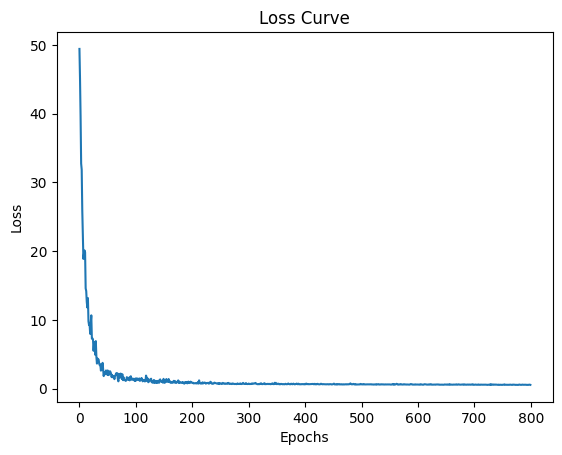

In [91]:
#plotting the loss
plt.plot(history.history['loss'])
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.title('Loss Curve')
plt.show()

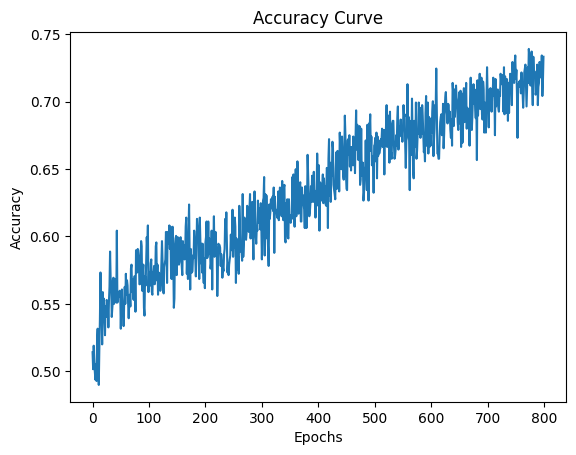

In [92]:
#plotting the accuracy
plt.plot(history.history['accuracy'])
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.title('Accuracy Curve')
plt.show()


9/9 [==============================] - 0s 2ms/step
[[ 91  43]
 [ 24 100]]


<Axes: >

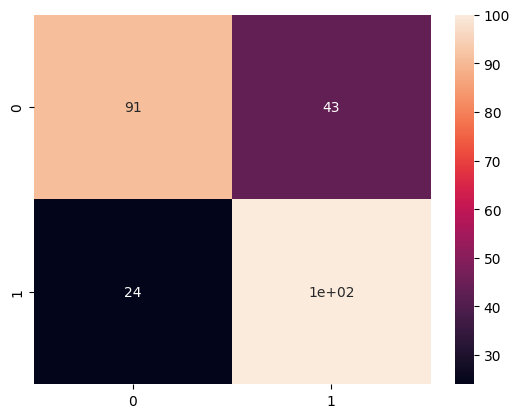

In [93]:
from sklearn.metrics import confusion_matrix , classification_report
y_pred = []
yp = model.predict(X_test)
for i in yp:
    if i >= 0.5:
        y_pred.append(1)
    else:
        y_pred.append(0)

from seaborn import heatmap
cm = confusion_matrix(y_test, y_pred)
print(cm)
heatmap(cm, annot=True)



In [94]:
model.save('my_model2.h5')
# Python

# import tensorflowjs as tfjs


# tfjs.converters.save_keras_model(model, 'tfjs_model')

# bash

# tensorflowjs_converter --input_format keras \C:/Users/dutta/Desktop/Apratim/machine learning/my_model1.h5 \C:/Users/dutta/Desktop/Apratim/machine learning
                       

c:\Users\dutta\anaconda3\envs\py310\lib\site-packages\keras\src\engine\training.py:3103: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(
